In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
from pandas.api.types import CategoricalDtype


# Data Preparation

In [12]:
products = pd.read_csv("olist_products_dataset.csv")

In [13]:
#translating names of product_category_names

In [14]:
prod_cat_name_tr = pd.read_csv("product_category_name_translation.csv")


In [15]:
products = products.merge(prod_cat_name_tr, on='product_category_name', how='left')

In [16]:
products.drop('product_category_name',axis= 1,inplace = True)

In [17]:
products

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [18]:
#load all the tables
o_items = pd.read_csv("olist_order_items_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
o_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
geoloc = pd.read_csv("olist_geolocation_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
o_payments = pd.read_csv("olist_order_payments_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")

In [19]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [20]:
o_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [21]:
orderdetails = orders.merge(o_items, on='order_id', how='left')

In [22]:
orderdetails

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [23]:
o_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [24]:
orderdetails = orderdetails.merge(o_payments, on='order_id', how='outer', validate='m:m')
orderdetails = orderdetails.merge(o_reviews, on='order_id', how='outer')
orderdetails = orderdetails.merge(products, on='product_id', how='outer')
orderdetails = orderdetails.merge(customers, on='customer_id', how='outer')
orderdetails = orderdetails.merge(sellers, on='seller_id', how='outer')

In [25]:
orderdetails

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,1.0,31ec3a565e06de4bdf9d2a511b822b4d,...,28.0,28.0,construction_tools_lights,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,13660.0,porto ferreira,SP
119139,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00,1.0,241a1ffc9cf969b27de6e72301020268,...,4.0,11.0,auto,78a159045124eb7601951b917a42034f,89111,gaspar,SC,89031.0,blumenau,SC
119140,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,1.0,1d187e8e7a30417fda31e85679d96f0f,...,8.0,30.0,furniture_decor,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,13478.0,americana,SP
119141,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,1.0,6e1c2008dea1929b9b6c27fa01381e90,...,21.0,41.0,furniture_decor,e55e436481078787e32349cee9febf5e,39803,teofilo otoni,MG,8320.0,sao paulo,SP


In [26]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

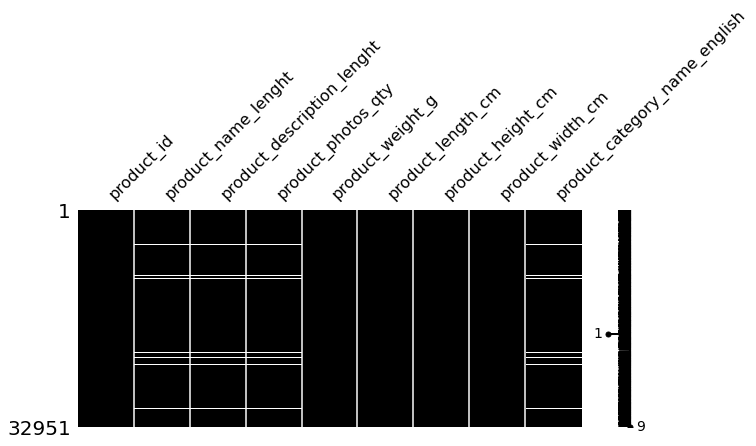

In [27]:
import missingno as mn
mn.matrix(products,color=(0,0,0),figsize = (10,4))

In [28]:
products.columns

Index(['product_id', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [29]:
products['product_category_name_english'].isnull().sum()
products.isnull().sum()/products.isnull().count()*100


product_id                       0.000000
product_name_lenght              1.851234
product_description_lenght       1.851234
product_photos_qty               1.851234
product_weight_g                 0.006070
product_length_cm                0.006070
product_height_cm                0.006070
product_width_cm                 0.006070
product_category_name_english    1.890686
dtype: float64

In [30]:
#PERCENTAGE OF THE MISSING VALUES - DataFrame..... 
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])


In [31]:
missing_data(products)[missing_data(products)["Percentage"]!=0].style.background_gradient(cmap='winter')

,Total,Percentage
product_category_name_english,623,1.890686
product_photos_qty,610,1.851234
product_description_lenght,610,1.851234
product_name_lenght,610,1.851234
product_width_cm,2,0.006070
product_height_cm,2,0.006070
product_length_cm,2,0.006070
product_weight_g,2,0.006070


<AxesSubplot:>

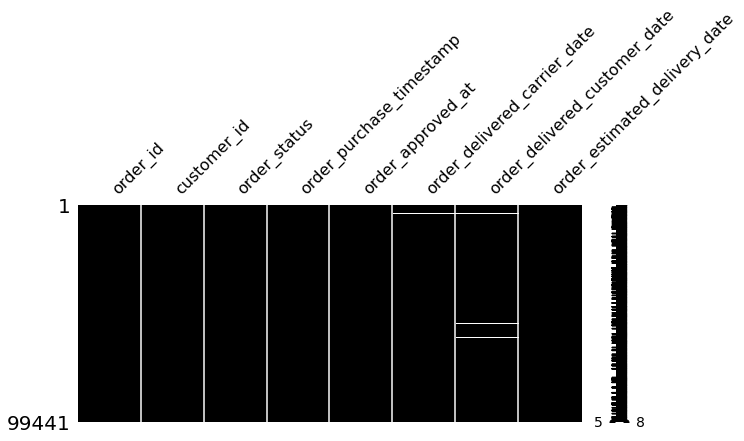

In [32]:
mn.matrix(orders,color=(0,0,0),figsize = (10,4))

In [33]:
missing_data(orders)[missing_data(orders)["Percentage"]!=0].style.background_gradient(cmap='winter')

,Total,Percentage
order_delivered_customer_date,2965,2.981668
order_delivered_carrier_date,1783,1.793023
order_approved_at,160,0.160899


In [34]:
products.columns

Index(['product_id', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [35]:
orderdetails.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [36]:
#find common columns in two dataframes

In [37]:
a = np.intersect1d(products.columns, orderdetails.columns)

In [38]:
a

array(['product_category_name_english', 'product_description_lenght',
       'product_height_cm', 'product_id', 'product_length_cm',
       'product_name_lenght', 'product_photos_qty', 'product_weight_g',
       'product_width_cm'], dtype=object)

In [39]:
products.reset_index(inplace = True)

In [40]:
orderdetails.reset_index(inplace = True)

In [41]:
df= products.merge(orderdetails,on ='product_id',how = 'inner')

In [42]:
df

,index_x,product_id,product_name_lenght_x,product_description_lenght_x,product_photos_qty_x,product_weight_g_x,product_length_cm_x,product_height_cm_x,product_width_cm_x,product_category_name_english_x,...,product_height_cm_y,product_width_cm_y,product_category_name_english_y,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,...,10.0,14.0,perfumery,b1a1199364a4a7fe27c4486ab63f550d,13848,mogi-guacu,SP,3694.0,sao paulo,SP
1,1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,...,18.0,20.0,art,4b86049cb99e4aa774031daa9cd18f18,20551,rio de janeiro,RJ,2955.0,sao paulo,SP
2,2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,...,9.0,15.0,sports_leisure,f63805d9c7edb84d92413af34b86a39c,5821,sao paulo,SP,2016.0,sao paulo,SP
3,3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,...,4.0,26.0,baby,619e926d09b26efbd5180368b1ddc874,2018,sao paulo,SP,13330.0,indaiatuba,SP
4,4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,...,17.0,13.0,housewares,ad353b4fb0e294adc4eda48af73e68a6,5835,sao paulo,SP,4461.0,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,32949,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,...,13.0,20.0,computers_accessories,4d1bbadcfd9bdc738e54599627870319,38130,campo florido,MG,13720.0,sao jose do rio pardo,SP
118306,32949,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,...,13.0,20.0,computers_accessories,2cc893f1618b7317170ba2456cf76117,46190,paramirim,BA,13720.0,sao jose do rio pardo,SP
118307,32949,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,...,13.0,20.0,computers_accessories,2cc893f1618b7317170ba2456cf76117,46190,paramirim,BA,13720.0,sao jose do rio pardo,SP
118308,32949,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,...,13.0,20.0,computers_accessories,2cc893f1618b7317170ba2456cf76117,46190,paramirim,BA,13720.0,sao jose do rio pardo,SP


In [43]:
df.drop('index_x',inplace= True,axis =1)

In [44]:
df.columns

Index(['product_id', 'product_name_lenght_x', 'product_description_lenght_x',
       'product_photos_qty_x', 'product_weight_g_x', 'product_length_cm_x',
       'product_height_cm_x', 'product_width_cm_x',
       'product_category_name_english_x', 'index_y', 'order_id', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_name_lenght_y', 'product_description_lenght_y',
       'product_photos_qty_y', 'product_weight_g_y', 'product_length_cm_y',
       'product_height_cm_y', 'product_width_cm_y',
       'product_catego

# Evolvement of Ecommerce in Brazil


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118310 entries, 0 to 118309
Data columns (total 48 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   product_id                       118310 non-null  object 
 1   product_name_lenght_x            116601 non-null  float64
 2   product_description_lenght_x     116601 non-null  float64
 3   product_photos_qty_x             116601 non-null  float64
 4   product_weight_g_x               118290 non-null  float64
 5   product_length_cm_x              118290 non-null  float64
 6   product_height_cm_x              118290 non-null  float64
 7   product_width_cm_x               118290 non-null  float64
 8   product_category_name_english_x  116576 non-null  object 
 9   index_y                          118310 non-null  int64  
 10  order_id                         118310 non-null  object 
 11  customer_id                      118310 non-null  object 
 12  or

converting objects to timestamp for analysis

In [46]:
df[['order_purchase_timestamp', 'order_delivered_customer_date']]=df[['order_purchase_timestamp', 'order_delivered_customer_date']].apply(pd.to_datetime)

In [47]:
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])

In [48]:
df['Year'] = df['order_purchase_timestamp'].dt.year

In [49]:
df.groupby('Year').size()

Year
2016      392
2017    53981
2018    63937
dtype: int64

Text(0.5, 1.0, 'Years')

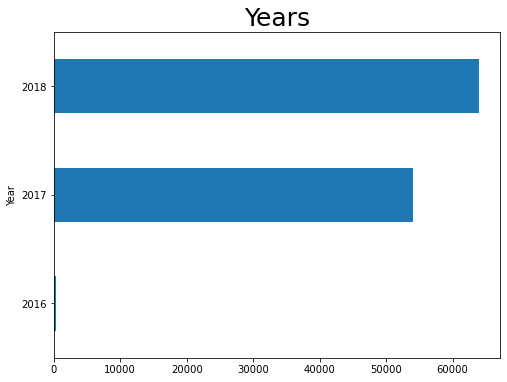

In [50]:
df.groupby('Year').size().plot(kind = 'barh',figsize= (8,6))
plt.title('Years',fontsize=25)

Text(0.5, 1.0, 'Years')

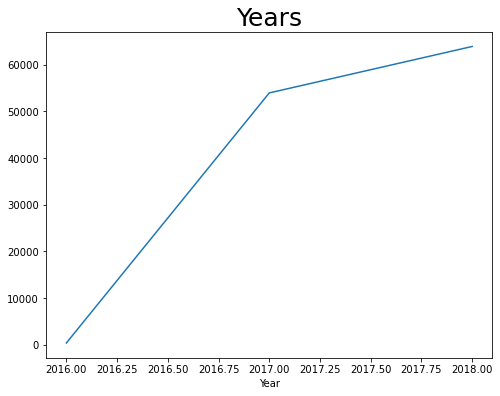

In [51]:
df.groupby('Year').size().plot(kind = 'line',figsize= (8,6))
plt.title('Years',fontsize=25)

There is huge jump on demand for ecommerce from 2016 to 2017 , nevertheless it remained steady throughout 2017

In [52]:
df.isnull().sum()

product_id                              0
product_name_lenght_x                1709
product_description_lenght_x         1709
product_photos_qty_x                 1709
product_weight_g_x                     20
product_length_cm_x                    20
product_height_cm_x                    20
product_width_cm_x                     20
product_category_name_english_x      1734
index_y                                 0
order_id                                0
customer_id                             0
order_status                            0
order_purchase_timestamp                0
order_approved_at                      15
order_delivered_carrier_date         1254
order_delivered_customer_date        2588
order_estimated_delivery_date           0
order_item_id                           0
seller_id                               0
shipping_limit_date                     0
price                                   0
freight_value                           0
payment_sequential                

In [53]:
df.drop(['review_comment_title','review_comment_message'],axis = 1,inplace= True)


In [54]:
df['product_name_lenght_y']

0         40.0
1         44.0
2         46.0
3         27.0
4         37.0
          ... 
118305    60.0
118306    60.0
118307    60.0
118308    60.0
118309    58.0
Name: product_name_lenght_y, Length: 118310, dtype: float64

In [55]:
df.dropna(inplace= True)

In [56]:
df.shape

(113193, 47)

# Month level Purchasing behaviour

In [57]:
df['Month'] = df['order_purchase_timestamp'].dt.month_name()


In [58]:
df['Month']

0           April
1         January
2            July
3          August
4           April
           ...   
118305    January
118306      March
118307      March
118308      March
118309       June
Name: Month, Length: 113193, dtype: object

In [59]:
month = df.groupby('Month').size().sort_values(ascending = False)
month

Month
August       12268
May          12190
July         11780
March        11194
June         10901
April        10609
February      9560
January       9101
November      8692
December      6262
October       5716
September     4920
dtype: int64

Text(0.5, 1.0, 'Months')

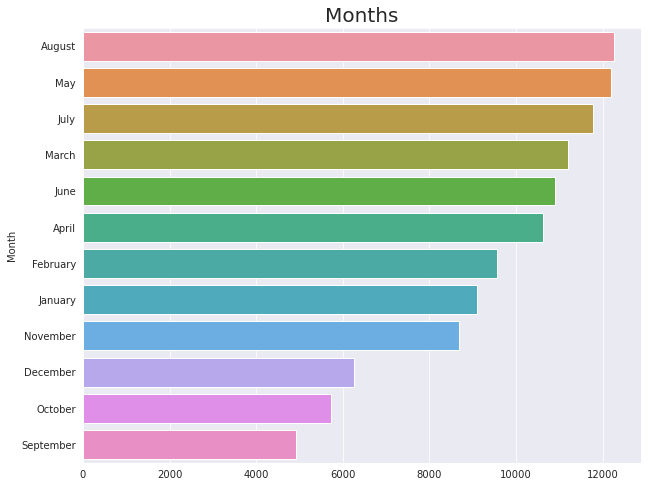

In [60]:
fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=month.index, x=month.values)
plt.title('Months',fontsize=20)

August and may have more no ofsales while september has the least

# Observing sales of both month and year

In [61]:
df['Monthyr'] = df['order_purchase_timestamp'].map(lambda x: x.strftime('%b%Y'))  #%b gets categorical month

In [62]:
monthyr = df.groupby('Monthyr').size().sort_values(ascending = False)

Text(0.5, 1.0, 'MonthYR')

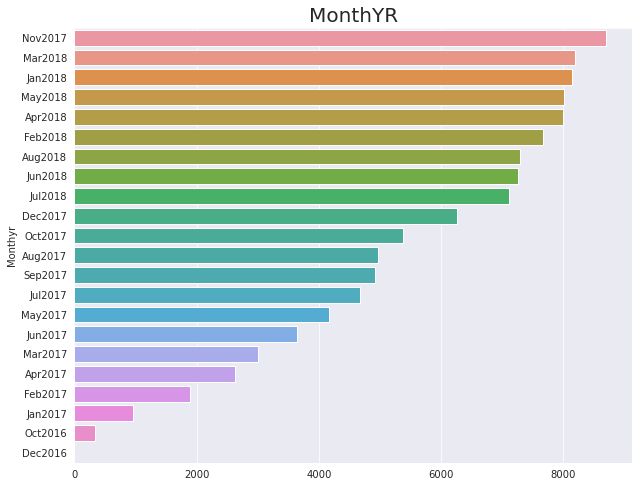

In [63]:
fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=monthyr.index, x=monthyr.values)
plt.title('MonthYR',fontsize=20)

In [64]:
df.to_csv('FinalData.csv')

# WeekDay sales Analysis

In [65]:
df['WeekDay'] = df['order_purchase_timestamp'].dt.strftime('%A')

In [66]:
week = df.groupby('WeekDay').size().sort_values(ascending = False)

Text(0.5, 1.0, 'WeekDay Sales')

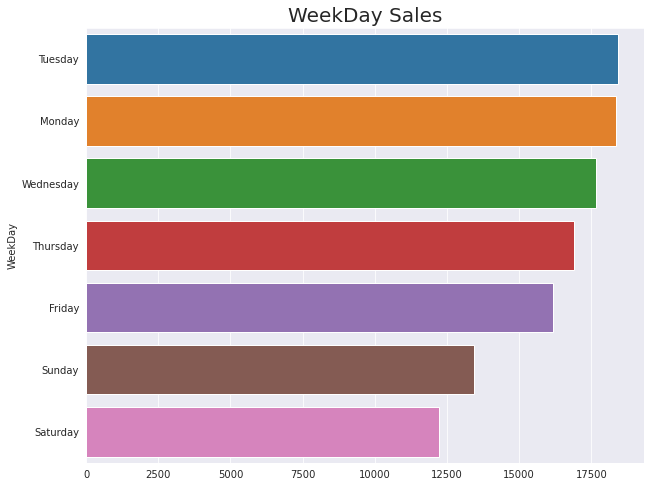

In [67]:
fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=week.index, x=week.values)
plt.title('WeekDay Sales',fontsize=20)

Tuesday,Monday and Wednesday have highest sales while Saturday has the lowest

# Top 10 Products that were sold

In [68]:
df.columns

Index(['product_id', 'product_name_lenght_x', 'product_description_lenght_x',
       'product_photos_qty_x', 'product_weight_g_x', 'product_length_cm_x',
       'product_height_cm_x', 'product_width_cm_x',
       'product_category_name_english_x', 'index_y', 'order_id', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_creation_date', 'review_answer_timestamp',
       'product_name_lenght_y', 'product_description_lenght_y',
       'product_photos_qty_y', 'product_weight_g_y', 'product_length_cm_y',
       'product_height_cm_y', 'product_width_cm_y',
       'product_category_name_english_y', 'customer_unique_id',
       'custome

Text(0.5, 1.0, 'Top 10 product category')

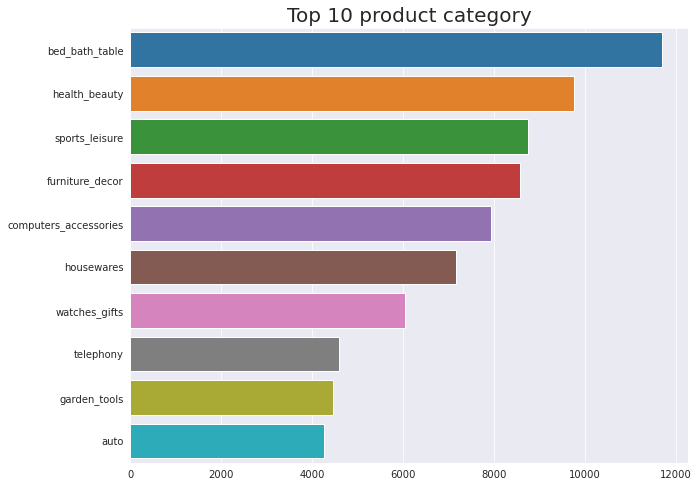

In [69]:
top_10_category = df["product_category_name_english_x"].value_counts().sort_values(ascending=False)[:10]

fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=top_10_category.index, x=top_10_category.values)
plt.title('Top 10 product category',fontsize=20)

# Top 10 cities where Sellers are high

Text(0.5, 1.0, 'Top 10 Cities with More Sellers')

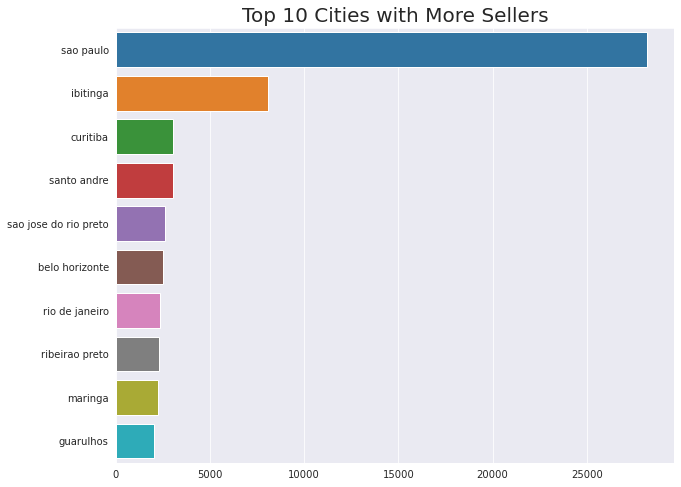

In [70]:
top_10_sellers = df['seller_city'].value_counts().sort_values(ascending=False)[:10]
fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=top_10_sellers.index, x=top_10_sellers.values)
plt.title('Top 10 Cities with More Sellers',fontsize=20)

Sao paulo has the highest Sellers from this analysis

In [71]:
# list of numerical variables............
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('-'*100)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  28
----------------------------------------------------------------------------------------------------
Numerical Variables Column:  ['product_name_lenght_x', 'product_description_lenght_x', 'product_photos_qty_x', 'product_weight_g_x', 'product_length_cm_x', 'product_height_cm_x', 'product_width_cm_x', 'index_y', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_item_id', 'shipping_limit_date', 'price', 'freight_value', 'payment_sequential', 'payment_installments', 'payment_value', 'review_score', 'product_name_lenght_y', 'product_description_lenght_y', 'product_photos_qty_y', 'product_weight_g_y', 'product_length_cm_y', 'product_height_cm_y', 'product_width_cm_y', 'customer_zip_code_prefix', 'seller_zip_code_prefix', 'Year']


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 118309
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   product_id                       113193 non-null  object        
 1   product_name_lenght_x            113193 non-null  float64       
 2   product_description_lenght_x     113193 non-null  float64       
 3   product_photos_qty_x             113193 non-null  float64       
 4   product_weight_g_x               113193 non-null  float64       
 5   product_length_cm_x              113193 non-null  float64       
 6   product_height_cm_x              113193 non-null  float64       
 7   product_width_cm_x               113193 non-null  float64       
 8   product_category_name_english_x  113193 non-null  object        
 9   index_y                          113193 non-null  int64         
 10  order_id                         113193 non-

In [73]:
#converting onject to datetime

def changedatetime(df):
    
    value= [features for features in df.columns if "date" in features or  features == 'order_approved_at' or "time" in features or "timestamp" in features]
    
    
    return value 

In [74]:
changedatetime(df)

for i in changedatetime(df):
    
    print(i,':',df[i].dtypes)

order_purchase_timestamp : datetime64[ns]
order_approved_at : object
order_delivered_carrier_date : object
order_delivered_customer_date : datetime64[ns]
order_estimated_delivery_date : object
shipping_limit_date : datetime64[ns]
review_creation_date : object
review_answer_timestamp : object


In [75]:
for i in changedatetime(df):
    if df[i].dtypes=='object':
       df[i]= pd.to_datetime(df[i])
        
        
#converting object to datetime        

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 118309
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   product_id                       113193 non-null  object        
 1   product_name_lenght_x            113193 non-null  float64       
 2   product_description_lenght_x     113193 non-null  float64       
 3   product_photos_qty_x             113193 non-null  float64       
 4   product_weight_g_x               113193 non-null  float64       
 5   product_length_cm_x              113193 non-null  float64       
 6   product_height_cm_x              113193 non-null  float64       
 7   product_width_cm_x               113193 non-null  float64       
 8   product_category_name_english_x  113193 non-null  object        
 9   index_y                          113193 non-null  int64         
 10  order_id                         113193 non-

In [79]:
df.head()

,product_id,product_name_lenght_x,product_description_lenght_x,product_photos_qty_x,product_weight_g_x,product_length_cm_x,product_height_cm_x,product_width_cm_x,product_category_name_english_x,index_y,...,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,Year,Month,Monthyr,WeekDay
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,89900,...,13848,mogi-guacu,SP,3694.0,sao paulo,SP,2018,April,Apr2018,Tuesday
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,57809,...,20551,rio de janeiro,RJ,2955.0,sao paulo,SP,2018,January,Jan2018,Wednesday
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,68415,...,5821,sao paulo,SP,2016.0,sao paulo,SP,2018,July,Jul2018,Monday
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,101576,...,2018,sao paulo,SP,13330.0,indaiatuba,SP,2018,August,Aug2018,Friday
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,92203,...,5835,sao paulo,SP,4461.0,sao paulo,SP,2018,April,Apr2018,Wednesday


In [89]:
average_price = df.groupby("product_category_name_english_x")["price"].mean().sort_values(ascending = False)

Text(0.5, 1.0, 'Average Price of Products ')

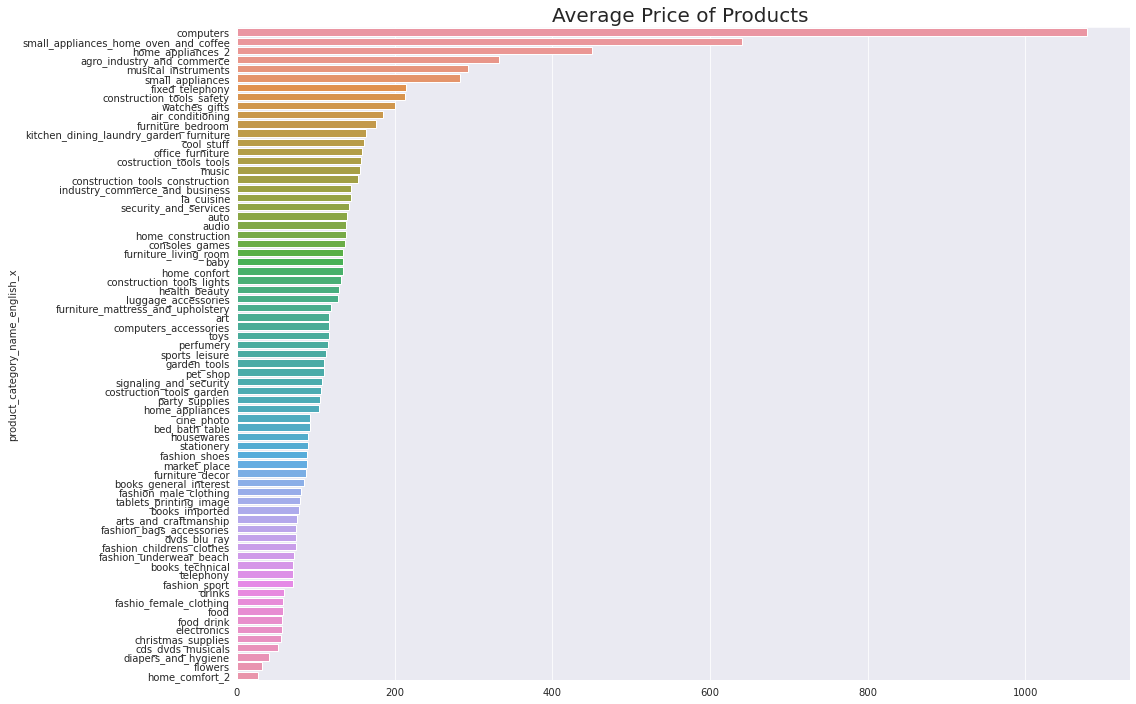

In [97]:
fig=plt.figure(figsize=(16,12))
sns.set_style("darkgrid")
sns.barplot(y=average_price.index, x=average_price.values)
plt.title('Average Price of Products ',fontsize=20)

In [91]:
top_10_category

bed_bath_table           11684
health_beauty             9749
sports_leisure            8734
furniture_decor           8554
computers_accessories     7926
housewares                7154
watches_gifts             6030
telephony                 4578
garden_tools              4451
auto                      4259
Name: product_category_name_english_x, dtype: int64

In [95]:
top_category = df[df['product_category_name_english_x'].isin(top_10_category.index)]

Text(0.5, 1.0, 'Average Price of top 10 Products ')

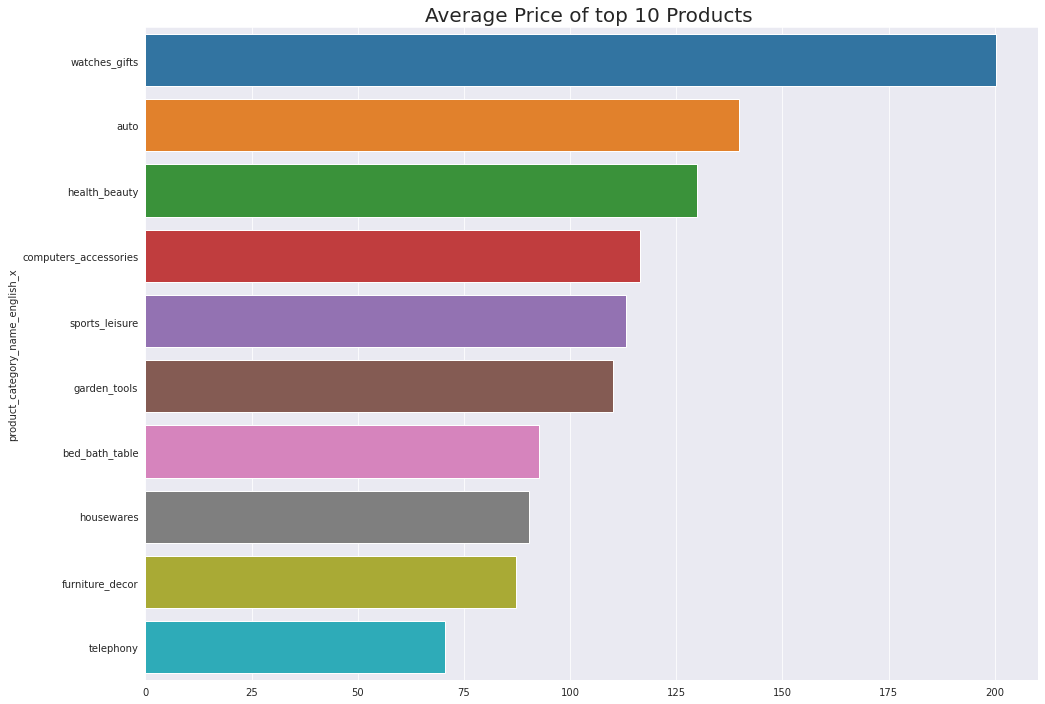

In [100]:
avgtop = top_category.groupby('product_category_name_english_x')['price'].mean().sort_values(ascending = False)
fig=plt.figure(figsize=(16,12))
sns.set_style("darkgrid")
sns.barplot(y=avgtop.index, x=avgtop.values)
plt.title('Average Price of top 10 Products ',fontsize=20)

Text(0.5, 1.0, 'Top Categories Average Price')

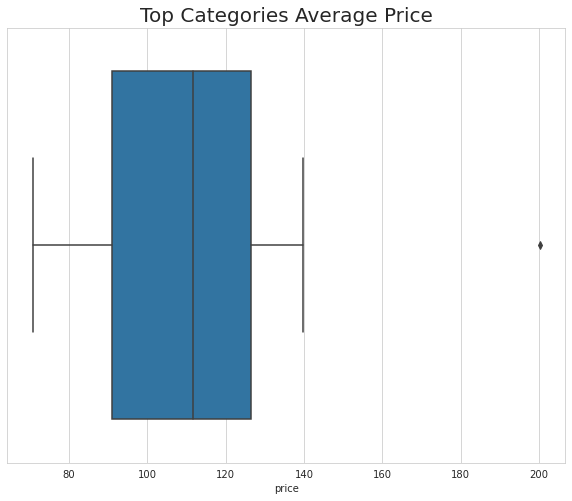

In [102]:
#boxplot on average of  top 10 price

fig=plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.boxplot(x=avgtop)
plt.title('Top Categories Average Price',fontsize=20)



In [107]:
pd.set_option('display.max_columns', 100)

In [108]:
df.head()

,product_id,product_name_lenght_x,product_description_lenght_x,product_photos_qty_x,product_weight_g_x,product_length_cm_x,product_height_cm_x,product_width_cm_x,product_category_name_english_x,index_y,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_name_lenght_y,product_description_lenght_y,product_photos_qty_y,product_weight_g_y,product_length_cm_y,product_height_cm_y,product_width_cm_y,product_category_name_english_y,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,Year,Month,Monthyr,WeekDay
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,89900,e17e4f88e31525f7deef66779844ddce,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,1.0,debit_card,1.0,18.30,d71da8fd8c6e3adef26be965f065b8a1,5.0,2018-04-28,2018-05-04 00:55:02,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,b1a1199364a4a7fe27c4486ab63f550d,13848,mogi-guacu,SP,3694.0,sao paulo,SP,2018,April,Apr2018,Tuesday
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,57809,5236307716393b7114b53ee991f36956,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,1.0,voucher,1.0,265.99,19866247db89845ef558ef19a6c26fcd,5.0,2018-02-17,2018-02-18 23:24:14,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,4b86049cb99e4aa774031daa9cd18f18,20551,rio de janeiro,RJ,2955.0,sao paulo,SP,2018,January,Jan2018,Wednesday
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,68415,01f66e58769f84129811d43eefd187fb,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,1.0,credit_card,1.0,87.62,32921b4e09c9a19d61fe46ce04231b84,5.0,2018-07-14,2018-07-16 16:20:04,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,f63805d9c7edb84d92413af34b86a39c,5821,sao paulo,SP,2016.0,sao paulo,SP,2018,July,Jul2018,Monday
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,101576,143d00a4f2dde4e0364ee1821577adb3,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,1.0,credit_card,2.0,121.84,70949d129965fb1ee32aaccec720a19e,1.0,2018-08-07,2018-08-08 11:53:04,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,619e926d09b26efbd5180368b1ddc874,2018,sao paulo,SP,13330.0,indaiatuba,SP,2018,August,Aug2018,Friday
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,92203,86cafb8794cb99a9b1b77fc8e48fbbbb,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,1.0,credit_card,4.0,46.19,74c9c7d0bc153bbbc92e4c1597b8ba55,5.0,2018-04-17,2018-04-18 04:29:47,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,ad353b4fb0e294adc4eda48af73e68a6,5835,sao paulo,SP,4461.0,sao paulo,SP,2018,April,Apr2018,Wednesday


# Analysing payment type

In [111]:
df.groupby('payment_type')['Year'].size()

payment_type
boleto         22015
credit_card    83534
debit_card      1622
voucher         6022
Name: Year, dtype: int64

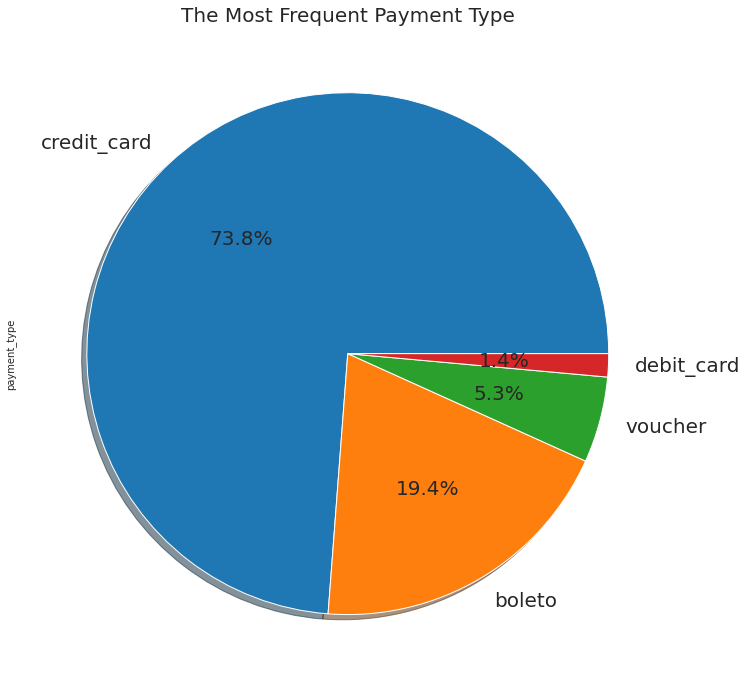

In [112]:
df["payment_type"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    fontsize=20,
    figsize=(12,12),
    shadow=True
    
)
plt.title('The Most Frequent Payment Type'.title() , fontsize=20);

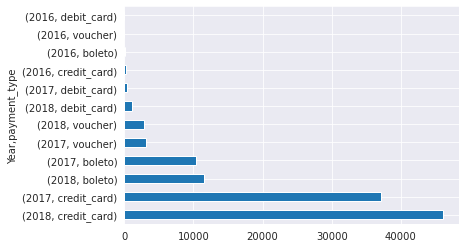

In [119]:
yearwisePayment = df.groupby('Year')['payment_type'].value_counts().sort_values(ascending = False).plot(kind = 'barh')


most common paymnet is credit card

Text(0.5, 1.0, 'Average Price of top 10 Products ')

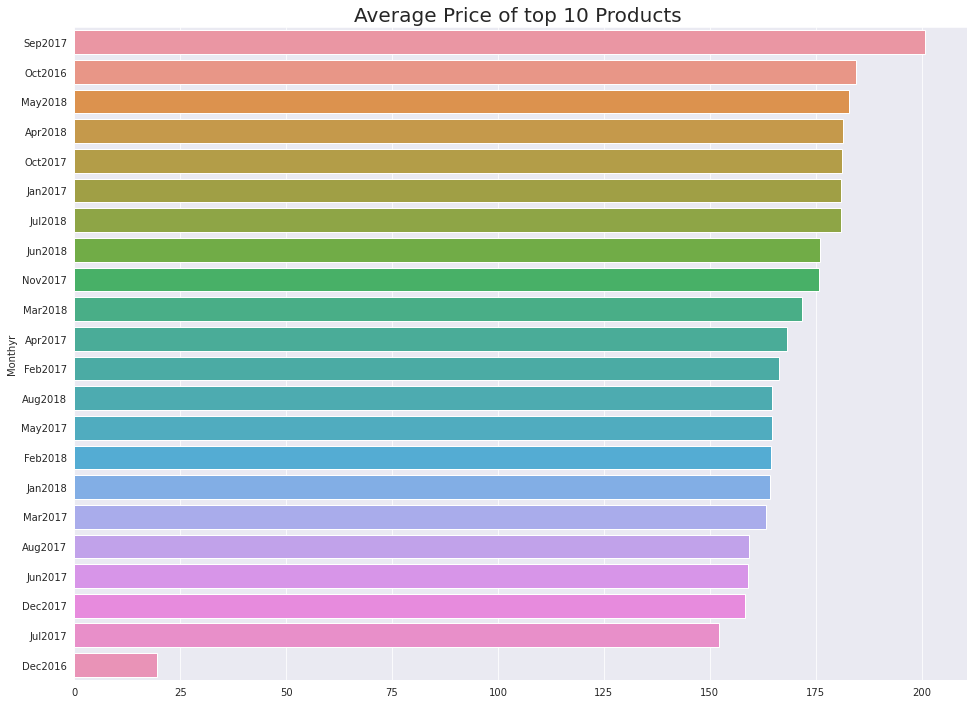

In [123]:
#Which part of year has more payment value
yrpaymnet = df.groupby('Monthyr')['payment_value'].mean().sort_values(ascending = False)
fig=plt.figure(figsize=(16,12))
sns.set_style("darkgrid")
sns.barplot(y=yrpaymnet.index, x=yrpaymnet.values)
plt.title('Average Price of top 10 Products ',fontsize=20)


In [124]:
df['order_delivered_customer_date'].astype(int)

0         1524847337000000000
1         1518787628000000000
2         1531351456000000000
3         1533568472000000000
4         1523659304000000000
                 ...         
118305    1516048775000000000
118306    1521835720000000000
118307    1521835720000000000
118308    1521835720000000000
118309    1530650786000000000
Name: order_delivered_customer_date, Length: 113193, dtype: int64

In [127]:
df['delivery_time'] = df['order_delivered_customer_date'].astype(int)- df['order_purchase_timestamp'].astype(int)

In [129]:
df['delivery_time']

0          260724000000000
1         1362692000000000
2          180375000000000
3          281922000000000
4          250507000000000
                ...       
118305    1056822000000000
118306    1498616000000000
118307    1498616000000000
118308    1498616000000000
118309     477055000000000
Name: delivery_time, Length: 113193, dtype: int64

In [130]:
df['delivery_time2'] = df['order_delivered_customer_date']- df['order_purchase_timestamp']

In [131]:
df['delivery_time2'] =df['delivery_time2'][:4]

In [133]:
df.drop('delivery_time2',axis= 1,inplace = True)

In [135]:
delivery_per_state = df.groupby("customer_state")['delivery_time'].mean()


<AxesSubplot:xlabel='customer_state'>

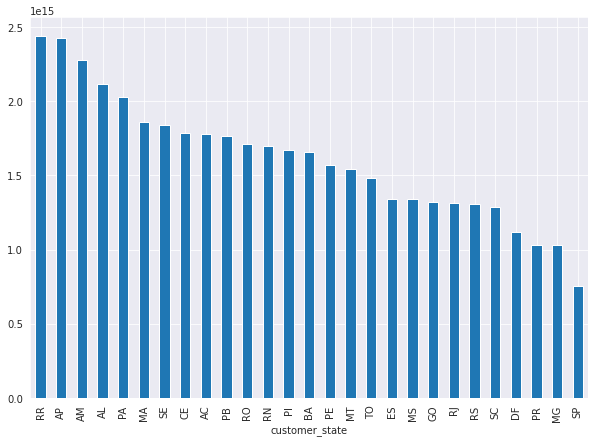

In [138]:
delivery_per_state = df.groupby("customer_state")['delivery_time'].mean().sort_values(ascending = False)
delivery_per_state.plot(
    kind='bar',
    figsize=(10,7)
)

In [144]:
yearwiseorderstatus = pd.DataFrame(df.groupby('Year')['order_status'].value_counts())

In [148]:
yearwiseorderstatus

order_status
Year order_status              
2016 delivered              329
     canceled                 6
2017 delivered            51183
2018 delivered            61674
     canceled                 1

<AxesSubplot:>

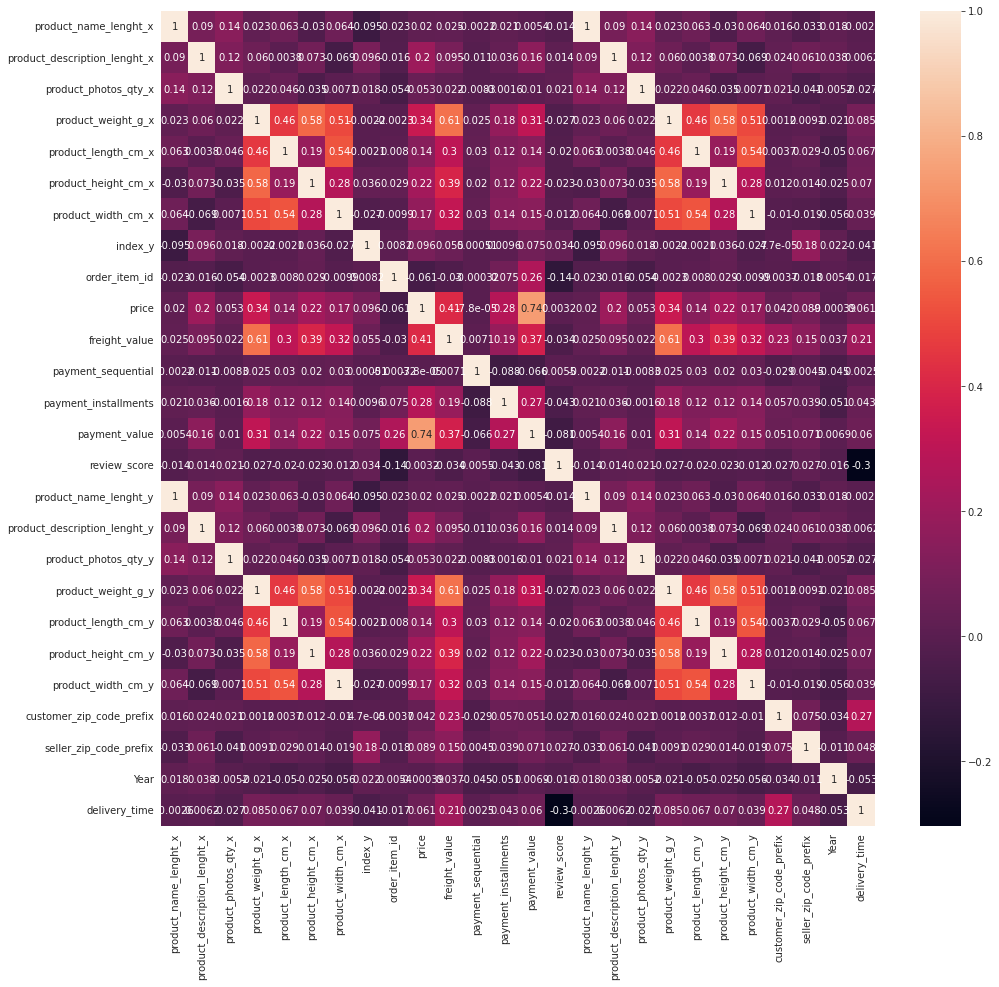

In [153]:
df_corr = df.corr()
fig=plt.figure(figsize=(16,15))
sns.set_style("darkgrid")

sns.heatmap(df_corr,annot = True)

In [ ]:
df